In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

In [69]:
industrie_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.8.3 Strom - € - Industrie', skiprows = 5, nrows = 26, index_col = 0)
industrie_prices_without_VAT = industrie_prices_without_VAT.iloc[:,0]
#household_prices_without_VAT.columns = ["year","price"]
industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()
industrie_prices_without_VAT.head()

,index,Unnamed: 1
0,1. HJ 2008,9.59
1,2. HJ 2008,9.57
2,1. HJ 2009,10.02
3,2. HJ 2009,10.07
4,1. HJ 2010,9.93


In [70]:

industrie_prices_without_VAT["index"]= industrie_prices_without_VAT["index"].str.slice(start = 5)
industrie_prices_without_VAT.columns = ["year","price"]


In [71]:
industrie_prices_without_VAT

,year,price
0,2008,9.59
1,2008,9.57
2,2009,10.02
3,2009,10.07
4,2010,9.93
5,2010,10.58
6,2011,11.21
7,2011,11.39
8,2012,11.45
9,2012,11.69


In [72]:
industrie_prices_without_VAT = industrie_prices_without_VAT.set_index("year")

industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT.index =  pd.to_datetime(industrie_prices_without_VAT.index, errors='ignore')
industrie_prices_without_VAT = industrie_prices_without_VAT.astype(float)
industrie_prices_without_VAT = industrie_prices_without_VAT.resample('12M').mean()
industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT

,price
year,
2008-01-31,9.580
2009-01-31,10.045
2010-01-31,10.255
2011-01-31,11.300
2012-01-31,11.570
2013-01-31,12.755
2014-01-31,13.510
2015-01-31,13.080
2016-01-31,12.735


In [73]:
industrie_prices_without_VAT.index= industrie_prices_without_VAT.index.str.slice(start = 0, stop = -6)
industrie_prices_without_VAT

,price
year,
2008,9.580
2009,10.045
2010,10.255
2011,11.300
2012,11.570
2013,12.755
2014,13.510
2015,13.080
2016,12.735


In [74]:
ht_industrie_prices_without_VAT = industrie_prices_without_VAT.price * 1.2148975797220616
nt_industrie_prices_without_VAT = industrie_prices_without_VAT.price * 0.8802060300272765


In [75]:
ht_industrie_prices_without_VAT

year
2008    11.638719
2009    12.203646
2010    12.458775
2011    13.728343
2012    14.056365
2013    15.496019
2014    16.413266
2015    15.890860
2016    15.471721
2017    15.417050
2018    14.967538
2019    16.224957
2020    18.484667
Name: price, dtype: float64

In [76]:
nt_industrie_prices_without_VAT

year
2008     8.432374
2009     8.841670
2010     9.026513
2011     9.946328
2012    10.183984
2013    11.227028
2014    11.891583
2015    11.513095
2016    11.209424
2017    11.169815
2018    10.844138
2019    11.755152
2020    13.392335
Name: price, dtype: float64

In [77]:
#industrie_prices_without_VAT = industrie_prices_without_VAT[6:].reset_index()
ht_industrie_prices_without_VAT = ht_industrie_prices_without_VAT.reset_index()
nt_industrie_prices_without_VAT = nt_industrie_prices_without_VAT.reset_index()

In [78]:
ht_industrie_prices_without_VAT
nt_industrie_prices_without_VAT

,year,price
0,2008,8.432374
1,2009,8.841670
2,2010,9.026513
3,2011,9.946328
4,2012,10.183984
5,2013,11.227028
6,2014,11.891583
7,2015,11.513095
8,2016,11.209424
9,2017,11.169815


In [79]:
industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()

In [80]:
#industrial 70000-150000 MWh
big_industrial_prices_BDEW = {'year': range(2007,2021), 'price': [7.91, 8.56, 8.69, 8.63, 10.07, 9.26, 10.18, 10.48, 9.76, 8.37, 9.96, 8.96, 9.28, 10.07]}
big_industrial_prices_BDEW = pd.DataFrame(data=big_industrial_prices_BDEW)
big_industrial_prices_BDEW

,year,price
0,2007,7.91
1,2008,8.56
2,2009,8.69
3,2010,8.63
4,2011,10.07
5,2012,9.26
6,2013,10.18
7,2014,10.48
8,2015,9.76
9,2016,8.37


What is the yearly demand?
If the demand is between 2000-20000 then enter 1 and If the demand is between 700000-1500000 then enter 2!
Do you have predefined value for electricity price?
Yes = 1 / No = 2
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021]
[ 7.91  8.56  8.69  8.63 10.07  9.26 10.18 10.48  9.76  8.37  9.96  8.96
  9.28 10.07 12.43]


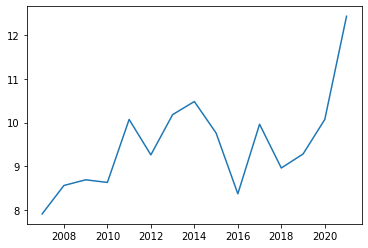

In [82]:

print("What is the yearly demand?")
print("If the demand is between 2000-20000 then enter 1 and If the demand is between 700000-1500000 then enter 2!")
val_yearly_demand = input("Enter your value:")
val_yearly_demand = int(val_yearly_demand)

if (val_yearly_demand == 1):
    print("Do you have predefined value for electricity price?")
    print("Yes = 1 / No = 2")
    #choose = 0
    val = input("Enter your value: ")
    val = int(val)
    if (val == 1):
        print("Do you have predefined value for electricity price with HT & NT?")
        print("Yes = 1 / No = 2")
        val_ht_nt = input("Enter your value: ")
        val_ht_nt = int(val_ht_nt)
        if (val_ht_nt == 1):
            val1 = input("Enter your preferred price for Haupttarrif: ")
            val1 = float(val1)
            val2 = input("Enter your preferred price for Nebentarrif: ")
            val2 = float(val2)
            ht_industrie_prices_without_VAT["year"] = ht_industrie_prices_without_VAT["year"].astype(int)
            ht_year = ht_industrie_prices_without_VAT["year"]
            ht_price = ht_industrie_prices_without_VAT["price"]

            ht_new_year = np.append(ht_year, 2021)
            ht_new_price = np.append(ht_price, val1)
            print(ht_new_year)
            print(ht_new_price)
            plt.figure()
            plt.plot (ht_new_year, ht_new_price)
            plt.show()

            nt_industrie_prices_without_VAT["year"] = nt_industrie_prices_without_VAT["year"].astype(int)
            nt_year = nt_industrie_prices_without_VAT["year"]
            nt_price = nt_industrie_prices_without_VAT["price"]

            nt_new_year = np.append(nt_year, 2021)
            nt_new_price = np.append(nt_price, val1)
            print(nt_new_year)
            print(nt_new_price)
            plt.figure()
            plt.plot (nt_new_year, nt_new_price)
            plt.show()
        
        if (val_ht_nt == 2):
            val1 = input("Enter your preferred price: ")
            val1 = float(val1)
            industrie_prices_without_VAT["year"] = industrie_prices_without_VAT["year"].astype(int)
            year = industrie_prices_without_VAT["year"]
            price = industrie_prices_without_VAT["price"]

            new_year = np.append(year, 2021)
            new_price = np.append(price, val1)
            print(new_year)
            print(new_price)
            plt.figure()
            plt.plot (new_year, new_price)
            plt.show()

    elif (val == 2):
        industrie_prices_without_VAT["year"] = industrie_prices_without_VAT["year"].astype(int)
        year = industrie_prices_without_VAT["year"]
        price = industrie_prices_without_VAT["price"]

        f = interpolate.interp1d(year, price, fill_value = "extrapolate")


        p_2021 = f(2021)

        new_year = np.append(year, 2021)
        new_price = np.append(price, f(2021))
        print(new_price)
        
        plt.figure()
        plt.plot (new_year, new_price)
        plt.show()

elif (val_yearly_demand == 2):
    print("Do you have predefined value for electricity price?")
    print("Yes = 1 / No = 2")
    #choose = 0
    val = input("Enter your value: ")
    val = int(val)
    if (val == 1):
        val1 = input("Enter your preferred price: ")
        val1 = float(val1)
        big_industrial_prices_BDEW["year"] = big_industrial_prices_BDEW["year"].astype(int)
        year = big_industrial_prices_BDEW["year"]
        price = big_industrial_prices_BDEW["price"]

        new_year = np.append(year, 2021)
        new_price = np.append(price, val1)
        print(new_year)
        print(new_price)
        plt.figure()
        plt.plot (new_year, new_price)
        plt.show()

    elif (val == 2):
        big_industrial_prices_BDEW["year"] = big_industrial_prices_BDEW["year"].astype(int)
        year = big_industrial_prices_BDEW["year"]
        price = big_industrial_prices_BDEW["price"]

        f = interpolate.interp1d(year, price, fill_value = "extrapolate")


        p_2021 = f(2021)

        new_year = np.append(year, 2021)
        new_price = np.append(price, f(2021))
        print(new_price)
        
        plt.figure()
        plt.plot (new_year, new_price)
        plt.show()




In [49]:
big_industrial_prices_BDEW

,Jahr,Preis
0,2007,7.91
1,2008,8.56
2,2009,8.69
3,2010,8.63
4,2011,10.07
5,2012,9.26
6,2013,10.18
7,2014,10.48
8,2015,9.76
9,2016,8.37
